In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('2020.csv')

In [ ]:
structures = [col for col in df.columns if "STR" in col]
narratives = [col for col in df.columns if "NARR" in col]
structures.remove('STRATEGIC_NARR')
reports = [col for col in df.columns if "RPT" in col] + ['FATALITIES', 'INJURIES']
totals = [col for col in df.columns if "TOTAL" in col]
threats = ['ACRES', 'CURR_INCIDENT_AREA', 'CAUSE', 'FUEL_MODEL', 'DISPATCH_PRIORITY','GACC_PRIORITY', 'SIGNIF_EVENTS_SUMMARY', 'ROAD_CLOSURE_FLAG', 'REMARKS', 'PLANNED_ACTIONS', 'EST_IM_COST_TO_DATE']
report_metadata = {"INCIDENT_NUMBER": "incident_number",
                   "INC_IDENTIFIER": "fire_id",
                   "IRWIN_ID": "IRWIN_ID",
                   "INC209R_IDENTIFIER": "report_id",
                   "COMPLEX": "complex"}
metadata = list(report_metadata.keys())


<Axes: ylabel='Frequency'>

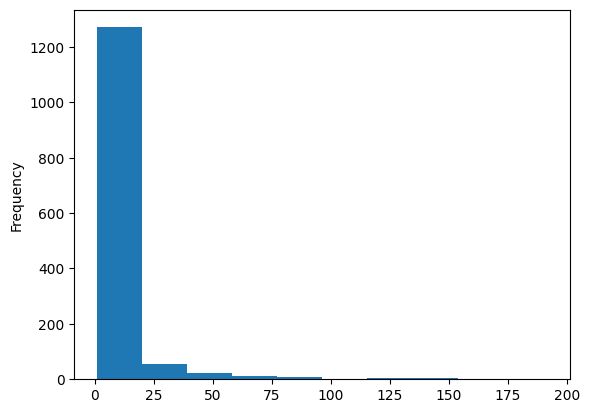

In [ ]:
df.groupby('INC_IDENTIFIER').size().sort_values()

In [ ]:
fire= df[df['INC_IDENTIFIER']==11843929]

In [ ]:
fire['REPORT_FROM_DATE']

6417     8/17/2020 13:45
6418      8/18/2020 8:00
6419      8/19/2020 8:00
6420      8/19/2020 9:00
6421     8/19/2020 20:00
              ...       
6604     11/7/2020 20:00
6605     11/8/2020 20:00
6606     11/9/2020 20:00
6607    11/10/2020 20:00
6608    11/11/2020 16:30
Name: REPORT_FROM_DATE, Length: 192, dtype: object

In [ ]:
fig = px.line(fire,  x=fire['REPORT_FROM_DATE'], y=['ACRES', 'CURR_INCIDENT_AREA', 'TOTAL_PERSONNEL'], title='Evolution of Two Columns Over Time')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['ACRES'], name='Acres'))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['CURR_INCIDENT_AREA'], name='Current area'))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['TOTAL_PERSONNEL'], name='Personnel', yaxis='y2'))
fig.update_layout(
    title='Evolution of Three Columns with Two Y-Axes',
    xaxis_title='DataFrame Index',
    yaxis=dict(
        title='Value for Column1 and Column2'
    ),
    yaxis2=dict(
        title='Value for Column3',
        overlaying='y',
        side='right'
    )
)


In [ ]:
fire= df[df['INC_IDENTIFIER']==11801418]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['ACRES'], name='Acres', hovertext=fire['CURRENT_THREAT_NARR']))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['TOTAL_PERSONNEL'], name='Personnel', yaxis='y2',  hovertext=fire['CURRENT_THREAT_NARR']))
fig.update_layout(
    title='Evolution of Area & Personnel',
    xaxis_title='Report date',
    yaxis=dict(
        title='Area'
    ),
    yaxis2=dict(
        title='Personnel',
        overlaying='y',
        side='right'
    )
)

In [ ]:
## Sentiment analysis

In [ ]:
fire[narratives]["CURRENT_THREAT_NARR"].iloc[0]

'forks of the kern trailhead; jerky mountain trailhead; facilities and trails within trout meadow; structures and facilities along the lloyd meadow road; rm pyles boys camp; grazing cattle west of north road; the freeman creek grove and other sequoia tree groves; the president george h.w. bush tree; camp whitsett  featuring numerous native american archeological values; peppermint fire station  yellow legged frog  golden trout critical habitats|pyles boys camp; grazing cattle west of north road; the freeman creek grove and other sequoia tree groves; the president george h.w. bush tree; camp whitsett  featuring numerous native american archeological values; peppermint fire station  yellow legged frog  golden trout critical habitats'

In [ ]:
fire[narratives]["CURRENT_THREAT_NARR"].iloc[-1]

"24 and 48 hour.|72 hour.|decrease in threat to structures : hockett meadows ranger station  peck's cabin  kern cabin  ming cabin  and quinn patrol cabin. wilderness values within the sequoia national park.|24 hour.|decrease in threat to structures and infrastructures  in the south fork canyon  case mountain sequoia groves  and wilderness values within the sequoia national park due to the recent rain."

In [ ]:
!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
token_counts = []
data = df['CURRENT_THREAT_NARR'].tolist()
for text in data:
    if not pd.isnull(text) or text=="none":
      tokens = tokenizer.tokenize(text)
      num_tokens = len(tokens)
      token_counts.append(num_tokens)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

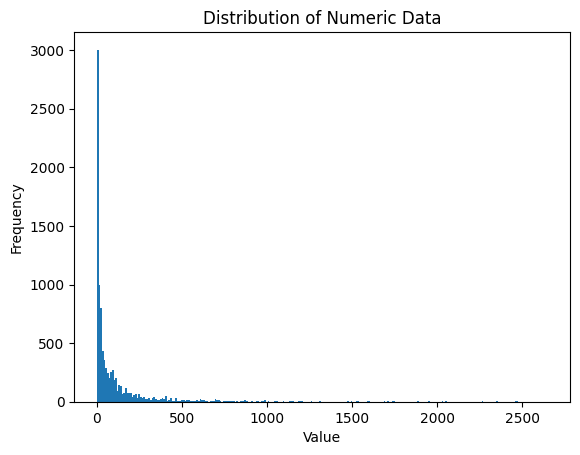

In [ ]:
import matplotlib.pyplot as plt
plt.hist(token_counts, bins='auto')
plt.title('Distribution of Numeric Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
data = fire['CURRENT_THREAT_NARR'].tolist()

In [ ]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [ ]:
model_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}
prediction = model_pipeline(data,**tokenizer_kwargs)

In [ ]:
prediction[0]

[{'label': 'NEGATIVE', 'score': 0.1416284739971161},
 {'label': 'POSITIVE', 'score': 0.8583714962005615}]

In [ ]:
normalized_scores = [sentiment['score'] for pred in prediction for sentiment in pred if sentiment['label'] == 'NEGATIVE']

In [ ]:
fire= df[df['INC_IDENTIFIER']==11801418]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['ACRES'], name='Acres', hovertext=fire['CURRENT_THREAT_NARR']))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['TOTAL_PERSONNEL'], name='Personnel', yaxis='y2',  hovertext=fire['CURRENT_THREAT_NARR']))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=normalized_scores, name="Sentiment", yaxis='y3'))
fig.update_layout(
    title='Evolution of Area & Personnel',
    xaxis_title='Report date',
    yaxis=dict(
        title='Area'
    ),
    yaxis2=dict(
        title='Personnel',
        overlaying='y',
        side='right'
    ),
    yaxis3=dict(
        title='Sentiment',
        overlaying='y',
        side='right',
        position=0.9
    )
)

In [ ]:
#select fires with more than 20 reports
sub_df = df.groupby('INC_IDENTIFIER').filter(lambda x: len(x) > 20)

In [ ]:
texts = sub_df['CURRENT_THREAT_NARR'].fillna("").tolist()

In [ ]:
predictions = model_pipeline(texts,**tokenizer_kwargs)

In [ ]:
negative_scores = [score['score'] for item in predictions for score in item if score['label'] == 'NEGATIVE']
len(negative_scores)

5044

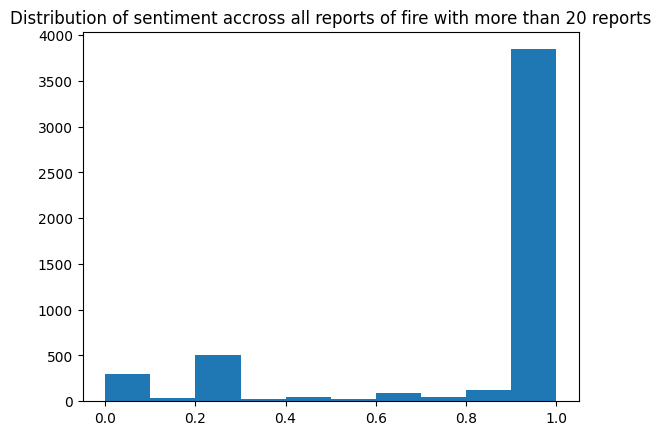

In [ ]:
import matplotlib.pyplot as plt
plt.hist(negative_scores)
plt.title("Distribution of sentiment accross all reports of fire with more than 20 reports");

In [ ]:
len(predictions)

5044

In [ ]:
import seaborn as sn

<ipython-input-99-12b5d1290e41>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

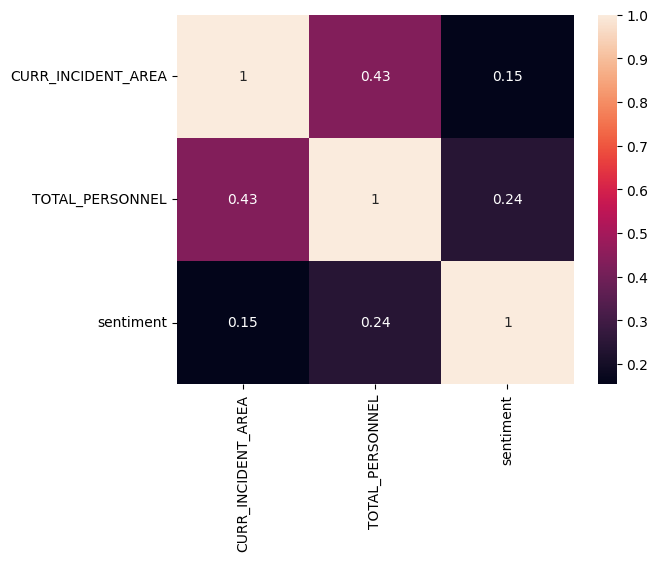

In [ ]:
outcomes = sub_df[['INC_IDENTIFIER', 'REPORT_FROM_DATE', 'ACRES', 'CURR_INCIDENT_AREA', 'TOTAL_PERSONNEL']]
outcomes.loc[:, 'sentiment'] = negative_scores
sn.heatmap(outcomes.iloc[:,3:].corr(), annot=True)

In [ ]:
outcomes['INC_IDENTIFIER']

In [ ]:
fire = outcomes[outcomes['INC_IDENTIFIER']==11801418]
fig = go.Figure()
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['ACRES'], name='Acres', hovertext=fire['CURRENT_THREAT_NARR']))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=fire['TOTAL_PERSONNEL'], name='Personnel', yaxis='y2',  hovertext=fire['CURRENT_THREAT_NARR']))
fig.add_trace(go.Scatter(x=fire['REPORT_FROM_DATE'], y=normalized_scores, name="Sentiment", yaxis='y3'))
fig.update_layout(
    title='Evolution of Area & Personnel',
    xaxis_title='Report date',
    yaxis=dict(
        title='Area'
    ),
    yaxis2=dict(
        title='Personnel',
        overlaying='y',
        side='right'
    ),
    yaxis3=dict(
        title='Sentiment',
        overlaying='y',
        side='right',
        position=0.9
    )
)

KeyError: 'CURRENT_THREAT_NARR'